In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dataset Description

The dataset contains sales data from different outlets of a retail goods business

In [2]:
df = pd.read_csv("bigdatamart_train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Let's look at different entries in categorical features

In [5]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Clearly the entries are not standardised, let's change all entries into Low Fat and Regular

In [6]:
df['Item_Fat_Content'].replace(["LF","low fat"],"Low Fat",inplace=True)
df['Item_Fat_Content'].replace(["reg"],"Regular",inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [7]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [8]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [9]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [10]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [12]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [13]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


(array([483., 870., 865., 664., 779., 629., 755., 735., 677., 603.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <a list of 10 Patch objects>)

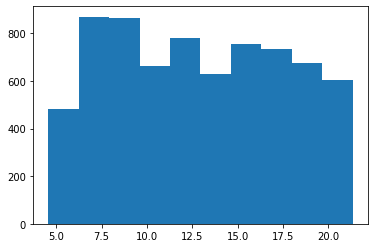

In [14]:
plt.hist(df["Item_Weight"])

(array([2639., 2329., 1563.,  979.,  593.,  279.,   60.,   35.,   29.,
          17.]),
 array([0.        , 0.03283909, 0.06567819, 0.09851728, 0.13135638,
        0.16419547, 0.19703457, 0.22987366, 0.26271276, 0.29555185,
        0.32839095]),
 <a list of 10 Patch objects>)

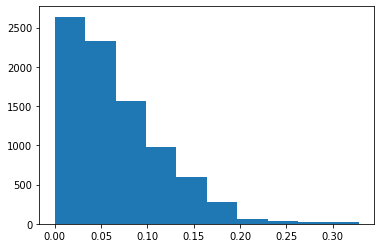

In [15]:
plt.hist(df["Item_Visibility"])

This shows that very few items have higher visibility or item visibility is highly skewed towards right

(array([ 923.,  573., 1053., 1248.,  804., 1098., 1200.,  480.,  557.,
         587.]),
 array([ 31.29   ,  54.84984,  78.40968, 101.96952, 125.52936, 149.0892 ,
        172.64904, 196.20888, 219.76872, 243.32856, 266.8884 ]),
 <a list of 10 Patch objects>)

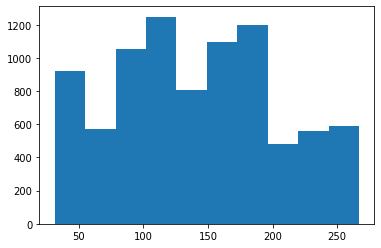

In [16]:
plt.hist(df["Item_MRP"])

The above plot shows that most of the items are priced around the mean item price along with a high variety of lowest priced items

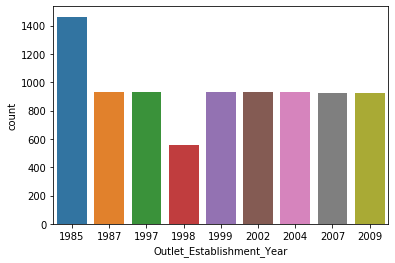

In [17]:
sns.countplot(df["Outlet_Establishment_Year"])

The above countplot reveals that no outlets were established between 1988-1996

(array([3.280e+03, 2.448e+03, 1.527e+03, 7.290e+02, 3.590e+02, 1.240e+02,
        3.600e+01, 1.600e+01, 2.000e+00, 2.000e+00]),
 array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
         6560.1274 ,  7865.49488,  9170.86236, 10476.22984, 11781.59732,
        13086.9648 ]),
 <a list of 10 Patch objects>)

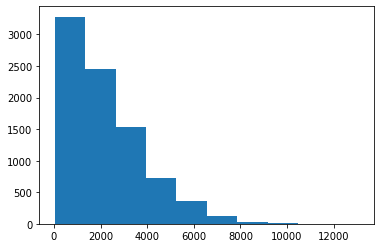

In [18]:
plt.hist(df["Item_Outlet_Sales"])

The above plot reveals that most of the sales figures were towards the minimum figure,
Highly skewed towards right

In [19]:
df.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

As observed visually, item visibility and item outlet sales are highly skewed

Bivariate analysis

In [20]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


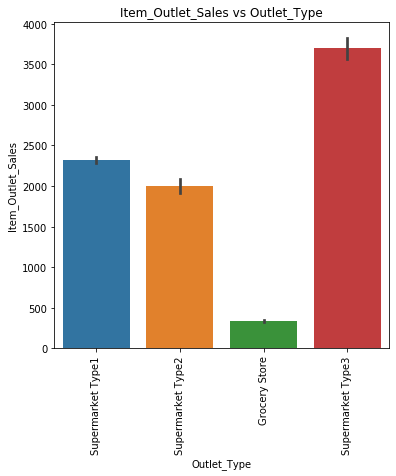

In [21]:
plt.figure(figsize= (6,6))
sns.barplot(x = df['Outlet_Type'], y = df['Item_Outlet_Sales'])
plt.xticks(rotation = 90) # slope of the words in the x axis 
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Outlet_Sales vs Outlet_Type')
plt.show()

As per the above plot, average sales were highest in the Supermarket type 3 and they were the lowest at grocery stores

Let's look at the total outlet type sales

In [22]:
Outlet_Type = df.groupby(['Outlet_Type'],sort = True).sum()
Outlet_Type

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Type,,,,,
Grocery Store,7166.800,113.565873,151939.1470,2156970,3.680343e+05
Supermarket Type1,71661.710,338.651189,787549.8868,11150224,1.291734e+07
Supermarket Type2,11946.465,56.621454,131477.7724,1864352,1.851823e+06
Supermarket Type3,0.000,54.804764,130714.6746,1855975,3.453926e+06


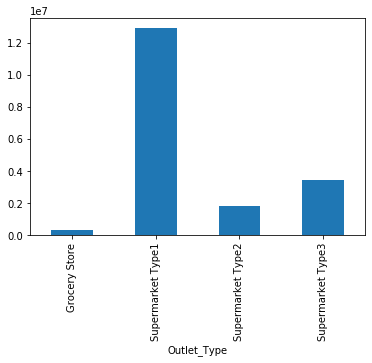

In [23]:
Outlet_Type["Item_Outlet_Sales"].plot.bar()

As per the above plot total sales were highest at Supermarket type 1 and lowest at grocery stores

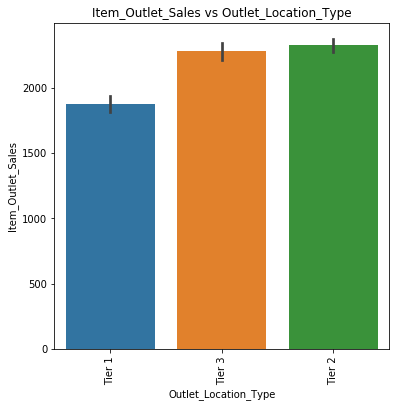

In [24]:
plt.figure(figsize= (6,6))
sns.barplot(x = df['Outlet_Location_Type'], y = df['Item_Outlet_Sales'])
plt.xticks(rotation = 90) # slope of the words in the x axis 
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Outlet_Sales vs Outlet_Location_Type')
plt.show()

In [25]:
Outlet_Type = df.groupby(['Outlet_Location_Type'],sort = True).sum()
Outlet_Type

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Location_Type,,,,,
Tier 1,23979.350,170.038072,336397.8120,4764360,4.482059e+06
Tier 2,35560.630,169.990299,393150.6416,5582060,6.472314e+06
Tier 3,31234.995,223.614910,472133.0272,6681101,7.636753e+06


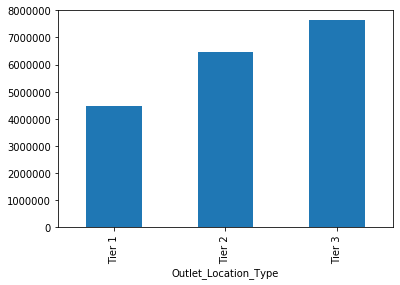

In [26]:
Outlet_Type["Item_Outlet_Sales"].plot.bar()

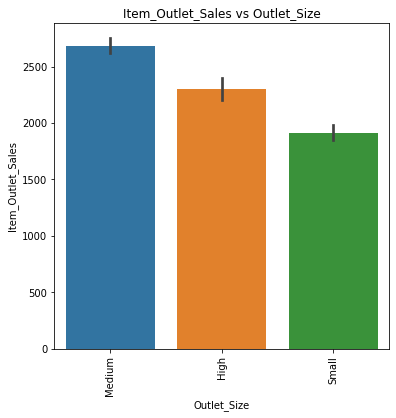

In [27]:
plt.figure(figsize= (6,6))
sns.barplot(x = df['Outlet_Size'], y = df['Item_Outlet_Sales'])
plt.xticks(rotation = 90) # slope of the words in the x axis 
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Outlet_Sales vs Outlet_Size')
plt.show()

In [28]:
Outlet_Type = df.groupby(['Outlet_Size'],sort = True).sum()
Outlet_Type

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Size,,,,,
High,12121.73,55.879859,131809.0156,1851884,2.142664e+06
Medium,23959.69,167.975374,392669.3068,5579397,7.489719e+06
Small,23897.42,170.463790,339024.8592,4769010,4.566212e+06


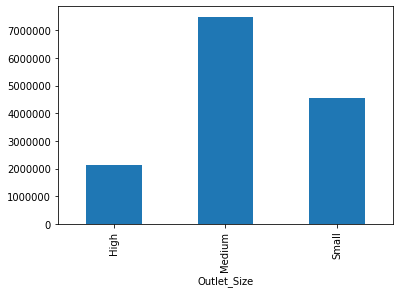

In [29]:
Outlet_Type["Item_Outlet_Sales"].plot.bar()

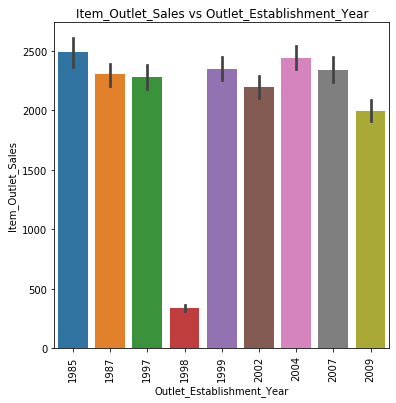

In [390]:
plt.figure(figsize= (6,6))
sns.barplot(x = df['Outlet_Establishment_Year'], y = df['Item_Outlet_Sales'])
plt.xticks(rotation = 90) # slope of the words in the x axis 
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Outlet_Sales vs Outlet_Establishment_Year')
plt.show()

In [391]:
Outlet_Type = df.groupby(['Outlet_Establishment_Year'],sort = True).sum()
Outlet_Type

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Outlet_Establishment_Year,,,,
1985,0.000,112.061805,204522.2570,3.633620e+06
1987,12121.730,55.879859,131809.0156,2.142664e+06
1997,11966.125,56.231875,132113.3698,2.118395e+06
1998,7166.800,56.308832,78131.5646,1.883402e+05
1999,12013.225,56.549156,130476.8598,2.183970e+06
2002,11751.840,56.180780,130942.7782,2.036725e+06
2004,11931.295,56.974873,133103.9070,2.268123e+06
2007,11877.495,56.834646,129103.9564,2.167465e+06
2009,11946.465,56.621454,131477.7724,1.851823e+06


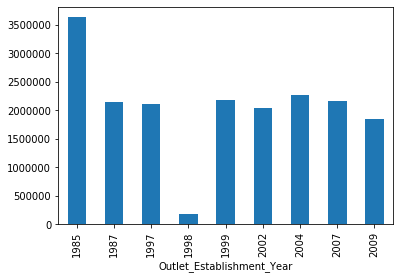

In [392]:
Outlet_Type["Item_Outlet_Sales"].plot.bar()

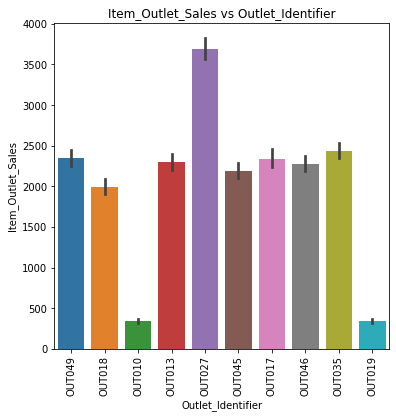

In [393]:
plt.figure(figsize= (6,6))
sns.barplot(x = df['Outlet_Identifier'], y = df['Item_Outlet_Sales'])
plt.xticks(rotation = 90) # slope of the words in the x axis 
plt.xlabel('Outlet_Identifier')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Outlet_Sales vs Outlet_Identifier')
plt.show()

In [394]:
Outlet_Type = df.groupby(['Outlet_Identifier'],sort = True).sum()
Outlet_Type

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Identifier,,,,,
OUT010,7166.800,56.308832,78131.5646,1108890,1.883402e+05
OUT013,12121.730,55.879859,131809.0156,1851884,2.142664e+06
OUT017,11877.495,56.834646,129103.9564,1858482,2.167465e+06
OUT018,11946.465,56.621454,131477.7724,1864352,1.851823e+06
OUT019,0.000,57.257041,73807.5824,1048080,1.796941e+05
OUT027,0.000,54.804764,130714.6746,1855975,3.453926e+06
OUT035,11931.295,56.974873,133103.9070,1863720,2.268123e+06
OUT045,11751.840,56.180780,130942.7782,1859858,2.036725e+06
OUT046,11966.125,56.231875,132113.3698,1857210,2.118395e+06


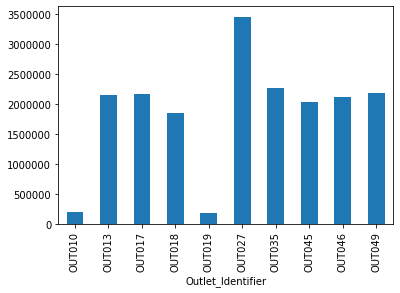

In [395]:
Outlet_Type["Item_Outlet_Sales"].plot.bar()

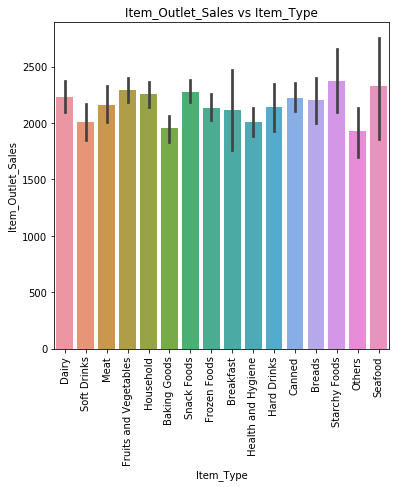

In [396]:
plt.figure(figsize= (6,6))
sns.barplot(x = df['Item_Type'], y = df['Item_Outlet_Sales'])
plt.xticks(rotation = 90) # slope of the words in the x axis 
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Outlet_Sales vs Item_Type')
plt.show()

In [30]:
Outlet_Type = df.groupby(['Item_Type'],sort = True).sum()
Outlet_Type

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Type,,,,,
Baking Goods,6580.530,44.821706,81894.7364,1294528,1.265525e+06
Breads,2314.775,16.630030,35379.1198,501412,5.532372e+05
Breakfast,1136.370,9.429531,15596.6966,219707,2.322990e+05
Canned,6632.775,44.215926,90706.7270,1296801,1.444151e+06
Dairy,7599.155,49.395349,101276.4596,1362419,1.522594e+06
Frozen Foods,9238.550,56.192325,118558.8814,1710309,1.825735e+06
Fruits and Vegetables,13476.040,84.407946,178124.0810,2461191,2.820060e+06
Hard Drinks,2086.260,13.897707,29334.6766,427610,4.577934e+05
Health and Hygiene,5651.195,28.712309,68025.8388,1038822,1.045200e+06


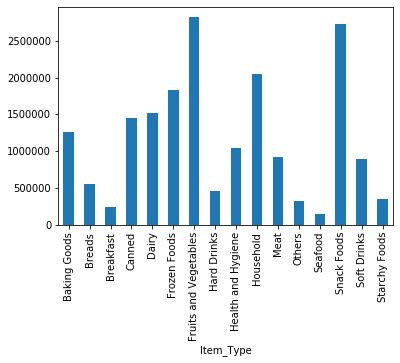

In [31]:
Outlet_Type["Item_Outlet_Sales"].plot.bar()

As per the above plot, snack foods and Fruits and vegetables have the highest toal sales

In [33]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


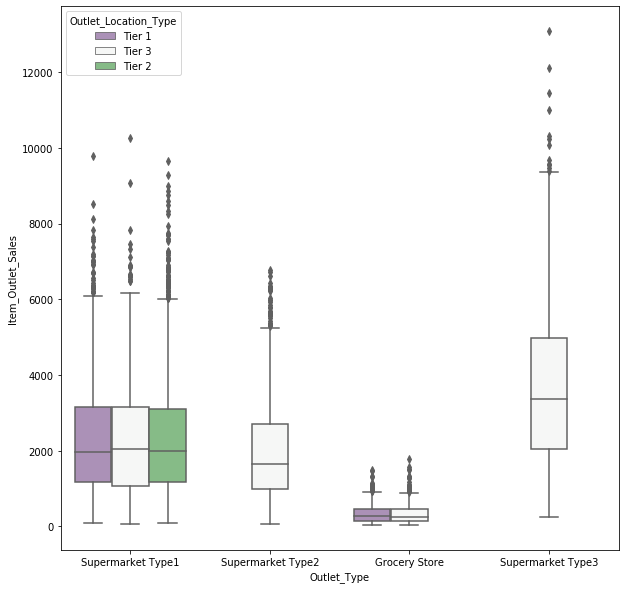

In [34]:
plt.figure(figsize= (10,10))
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", hue='Outlet_Location_Type', data=df, palette="PRGn")
plt.show()

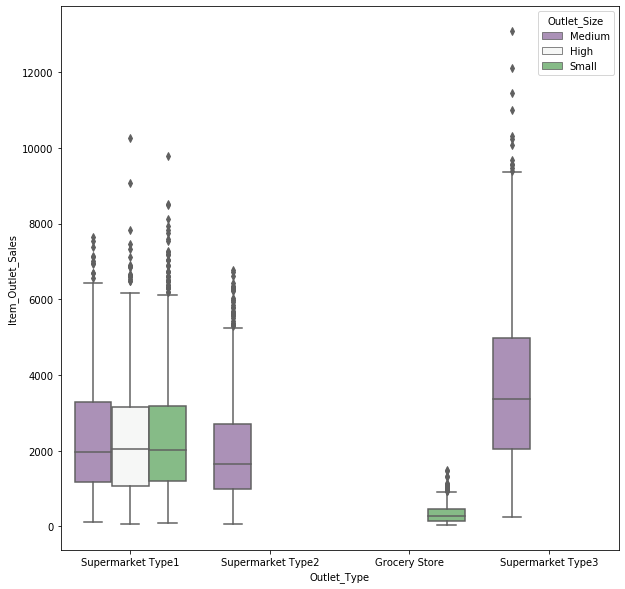

In [35]:
plt.figure(figsize= (10,10))
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", hue='Outlet_Size', data=df, palette="PRGn")
plt.show()

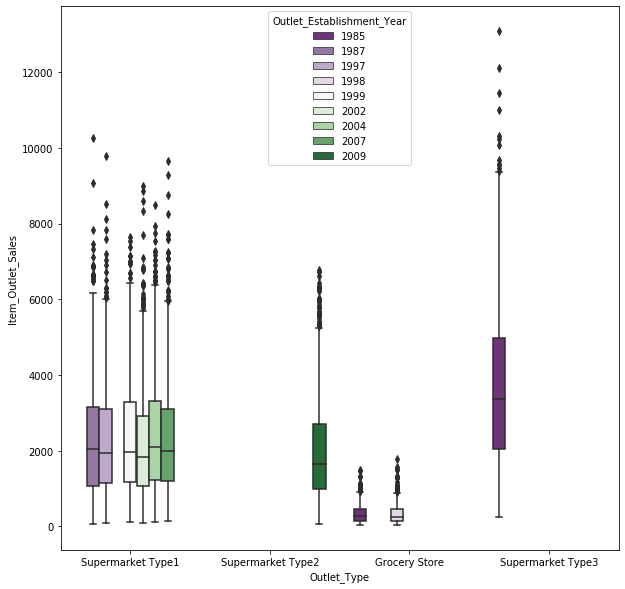

In [36]:
plt.figure(figsize= (10,10))
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", hue='Outlet_Establishment_Year', data=df, palette="PRGn")
plt.show()

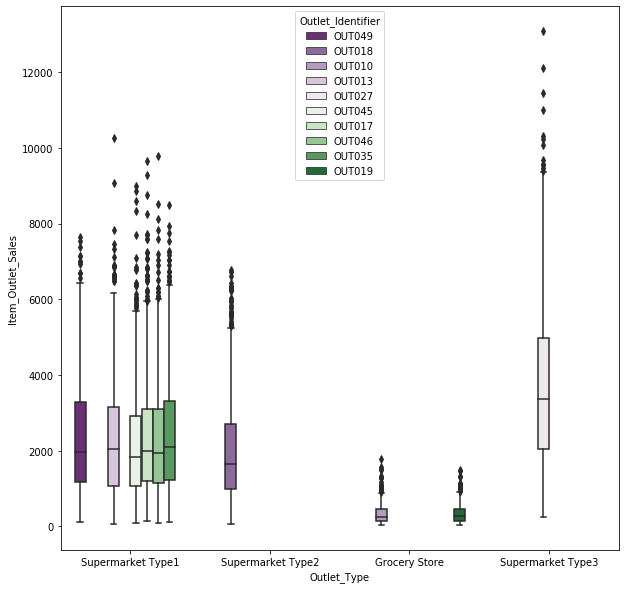

In [37]:
plt.figure(figsize= (10,10))
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", hue='Outlet_Identifier', data=df, palette="PRGn")
plt.show()

In [38]:
#Checking for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

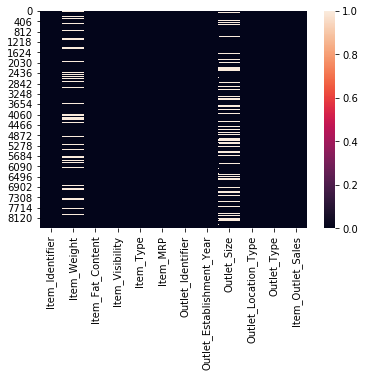

In [39]:
sns.heatmap(df.isnull())

In [40]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True)

In [41]:
df.drop("Outlet_Size",axis=1,inplace=True)

In [42]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [43]:
df.shape

(8523, 11)

In [44]:
df = df.dropna()

In [45]:
df.shape

(8523, 11)

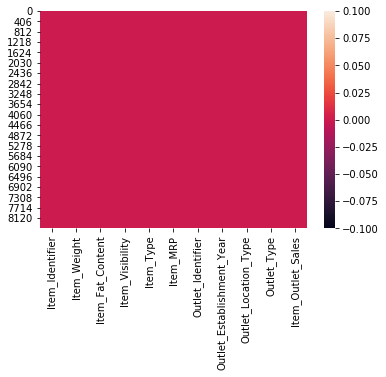

In [46]:
sns.heatmap(df.isnull())

In [47]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [48]:
df.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [49]:
pd.get_dummies(df["Item_Fat_Content"])

,Low Fat,Regular
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
8518,1,0
8519,0,1
8520,1,0
8521,0,1


In [50]:
Fat = pd.get_dummies(df["Item_Fat_Content"],drop_first=True)
Fat.head()

,Regular
0,0
1,1
2,0
3,1
4,0


In [51]:
I_type = pd.get_dummies(df["Item_Type"])
I_type.head()

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [52]:
O_Identifier = pd.get_dummies(df["Outlet_Identifier"])
O_Identifier.head()

,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [53]:
O_Establishment_Year = pd.get_dummies(df["Outlet_Establishment_Year"])
O_Establishment_Year.head()

,1985,1987,1997,1998,1999,2002,2004,2007,2009
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


In [54]:
#O_Size = pd.get_dummies(df["Outlet_Size"])
#O_Size.head()

In [55]:
O_Location_Type = pd.get_dummies(df["Outlet_Location_Type"])
O_Location_Type.head()

,Tier 1,Tier 2,Tier 3
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1


In [56]:
O_Type = pd.get_dummies(df["Outlet_Type"])
O_Type.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [57]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [58]:
df = pd.concat([df,Fat,I_type,O_Identifier,O_Establishment_Year,O_Location_Type,O_Type,],axis=1)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,...,2004,2007,2009,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,...,0,0,0,1,0,0,0,1,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,...,0,0,1,0,0,1,0,0,1,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,...,0,0,0,1,0,0,0,1,0,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,...,0,0,0,0,0,1,1,0,0,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,...,0,0,0,0,0,1,0,1,0,0


In [59]:
df.drop(["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Location_Type","Outlet_Type"], axis=1, inplace = True)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Regular,Baking Goods,Breads,Breakfast,Canned,Dairy,...,2004,2007,2009,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [60]:
df.shape

(8523, 47)

In [61]:
X=df.drop("Item_Outlet_Sales", axis=1)
y=df["Item_Outlet_Sales"]

Finding best random_state for Linear Regression Model

In [62]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
max_r2_score=0
for r_state in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=r_state)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r2_score:
        max_r2_score = r2_scr
        final_r_state = r_state
    
print("max R2 score corresponding to random state",final_r_state,"is",max_r2_score)

max R2 score corresponding to random state 3 is 0.5889009179383683


In [230]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=10)

In [231]:
print(X_train.shape,"\n",X_test.shape)

(4584, 42) 
 (1529, 42)


In [65]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [66]:
LR = LinearRegression()
RR = Ridge(alpha=0.1)
LSR = Lasso()
KNR = KNeighborsRegressor(n_neighbors=2)#(n_neighbors=2)
SV = SVR(kernel='rbf',C=100)
DTC = DecisionTreeRegressor(random_state=99)
RFC = RandomForestRegressor(n_estimators = 500,random_state = 99)
ABC = AdaBoostRegressor()#(n_estimators=100,base_estimator=SV,algorithm='SAMME')
GBC = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 240,random_state=99)
XGB = xgb.XGBRegressor(random_state=99)

In [67]:
models = []
models.append(("LinearRegression", LR))
models.append(("Ridge", RR))
models.append(("Lasso", LSR))
models.append(("KNeighborsRegressor", KNR))
models.append(("SVR", SV))
models.append(("DecisionTreeRegressor", DTC))
models.append(("RandomForestRegressor", RFC))
models.append(("AdaBoostRegressor", ABC))
models.append(("GradientBoostingRegressor", GBC))
models.append(("XGBoostRegressor", XGB))

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
Model = []
score = []
cvs = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    R2 = r2_score(y_test,pre)
    print("R2 Score = ",R2)
    score.append(R2)
    print("\n")
    sc = cross_val_score(model,X,y,cv=10,scoring="r2").mean()
    print("Cross val score = ",sc)
    cvs.append(sc*100)
    print("\n")
    print("Mean Squared error\n", mean_squared_error(y_test,pre))
    print("\n")
    mae = mean_absolute_error(y_test,pre)
    print("Mean absolute error \n{}".format(mae))
    print("\n\n")

***************** LinearRegression ******************

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2 Score =  0.5709684557741455


Cross val score =  0.5585146255553628


Mean Squared error
 1306724.9143881728


Mean absolute error 
849.8581730603379



***************** Ridge ******************

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


R2 Score =  0.5709706467178591


Cross val score =  0.5585163405804863


Mean Squared error
 1306718.2413106912


Mean absolute error 
849.8529505200629



***************** Lasso ******************

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


R2 Score =  0.571701991137662


Cross val score =  0.5596531029329825


Mean Squared error
 1304490.7454838299


Mean absolute er

In [70]:
result = pd.DataFrame({"Model": Model, "R2 Socre": score, "Cross val score": cvs})
result

,Model,R2 Socre,Cross val score
0,LinearRegression,0.570968,55.851463
1,Ridge,0.570971,55.851634
2,Lasso,0.571702,55.965310
3,KNeighborsRegressor,0.380199,36.121638
4,SVR,0.330790,32.126464
5,DecisionTreeRegressor,0.260780,18.634710
6,RandomForestRegressor,0.580253,55.832639
7,AdaBoostRegressor,0.429576,45.141772
8,GradientBoostingRegressor,0.602166,58.303649
9,XGBoostRegressor,0.547841,52.714321


Finding the best parameters for gradient boosting regressor

In [72]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [2,3,4,5,6,7,8],
              'n_estimators': [100,200,300,400,500,600]
             }
model = GradientBoostingRegressor()
grid = GridSearchCV(estimator=model,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.max_depth)
print(grid.best_params_)

KeyboardInterrupt: 

In [73]:
from sklearn.externals import joblib
joblib.dump(GBC,'Bigdatamart_sales.csv')

['Bigdatamart_sales.csv']

In [75]:
X1 = pd.read_csv("bigdatamart_test.csv")
X1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [78]:
X1.drop("Item_Identifier",axis=1,inplace=True)

In [79]:
Fat1 = pd.get_dummies(X1["Item_Fat_Content"])
Fat1.head()

,LF,Low Fat,Regular,low fat,reg
0,0,1,0,0,0
1,0,0,0,0,1
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [77]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Item_Weight            8523 non-null   float64
 1   Item_Visibility        8523 non-null   float64
 2   Item_MRP               8523 non-null   float64
 3   Regular                8523 non-null   uint8  
 4   Baking Goods           8523 non-null   uint8  
 5   Breads                 8523 non-null   uint8  
 6   Breakfast              8523 non-null   uint8  
 7   Canned                 8523 non-null   uint8  
 8   Dairy                  8523 non-null   uint8  
 9   Frozen Foods           8523 non-null   uint8  
 10  Fruits and Vegetables  8523 non-null   uint8  
 11  Hard Drinks            8523 non-null   uint8  
 12  Health and Hygiene     8523 non-null   uint8  
 13  Household              8523 non-null   uint8  
 14  Meat                   8523 non-null   uint8  
 15  Othe